<a href="https://colab.research.google.com/github/Interactics/Gait-Estimation-Algorithm/blob/master/Skeleton_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
### 데이터 끌어오기 

FileName = '0305WS2225origin' 
dataFile = '/content/' + FileName + '.txt'

name_arr =  ['time', 
'MidHip_x', 'MidHip_y', 'MidHip_z',
'RHip_x', 'RHip_y', 'RHip_z', 
'RKnee_x', 'RKnee_y', 'RKnee_z', 
'RAnkle_x', 'RAnkle_y', 'RAnkle_z',
'LHip_x', 'LHip_y', 'LHip_z', 
'LKnee_x', 'LKnee_y', 'LKnee_z', 
'LAnkle_x', 'LAnkle_y', 'LAnkle_z', 'm_speed'
]

rawData = pd.read_csv(dataFile, index_col = False, sep=' ', names = name_arr )

pd.options.display.float_format= '{:.4f}'.format

# 일반용

In [0]:
### 파일 이름 설정
FileName = '0305WS2230origin'
dataFile = '/content/' + FileName + '.txt'

### Index 이름 설정
Idx_arr =  ['time', 
             'MidHip_x', 'MidHip_y', 'MidHip_z',
             'RHip_x', 'RHip_y', 'RHip_z', 
             'RKnee_x', 'RKnee_y', 'RKnee_z', 'RAnkle_x', 
             'RAnkle_y', 'RAnkle_z','LHip_x', 'LHip_y', 'LHip_z', 
             'LKnee_x', 'LKnee_y', 'LKnee_z', 'LAnkle_x', 
             'LAnkle_y', 'LAnkle_z','FOO', 'm_speed'
]

###
#  해당 이름을 가진 파일을 끌어온 뒤, index 자동설정을 해제하고 
#  띄어쓰기 기준으로 데이터를 분할한다.
#  Index 이름은 Idx_arr으로 한다.
###
rawData = pd.read_csv(dataFile, index_col = False, sep=' ', names = Idx_arr)


### 데이터 내 특정 문자 제거
rawData = rawData.replace('\(','', regex=True)
rawData = rawData.replace('\)','', regex=True)
rawData = rawData.replace(',','', regex=True)
rawData = rawData.replace('data:','', regex=True)

### Nan 제거 
rawData = rawData.dropna(axis=0)

### obeject 타입에서 numeric한 타입으로 변환 
rawData = rawData.apply(pd.to_numeric)

### 특정 열 제거
del rawData['FOO']

###소수점 넷째자리까지 표현
pd.options.display.float_format= '{:.4f}'.format

### 데이터 저장
rawData.to_csv(FileName +'_refined' +'.csv')

# Modified 용 

In [0]:
###  파일 이름 설정
FileName = '0305WS2236mod'
dataFile = '/content/' + FileName + '.txt'

### Index 이름 설정

Idx_arr =  ['time', 
             'MidHip_x', 'MidHip_y', 'MidHip_z',
             'LHip_x', 'LHip_y', 'LHip_z', 
             'LKnee_x', 'LKnee_y', 'LKnee_z', 'LAnkle_x', 
             'LAnkle_y', 'LAnkle_z','RHip_x', 'RHip_y', 'RHip_z', 
             'RKnee_x', 'RKnee_y', 'RKnee_z', 'RAnkle_x', 
             'RAnkle_y', 'RAnkle_z','FOO', 'm_speed'
]
###
#  해당 이름을 가진 파일을 끌어온 뒤, index 자동설정을 해제하고 
#  띄어쓰기 기준으로 데이터를 분할한다.
#  Index 이름은 Idx_arr으로 한다.
###
rawData = pd.read_csv(dataFile, index_col = False, sep=' ', names = Idx_arr)

### 데이터 내 특정 문자 제거
rawData = rawData.replace('\(','', regex=True)
rawData = rawData.replace('\)','', regex=True)
rawData = rawData.replace(',','', regex=True)
rawData = rawData.replace('data:','', regex=True)

### Nan 제거 
rawData = rawData.dropna(axis=0)

### obeject 타입에서 numeric한 타입으로 변환 
rawData = rawData.apply(pd.to_numeric)

### 특정 열 제거
del rawData['FOO']

###소수점 넷째자리까지 표현
pd.options.display.float_format= '{:.4f}'.format

### 데이터 저장
rawData.to_csv(FileName +'_refined' +'.csv')

FileNotFoundError: ignored

In [0]:
## delete OUT-Liar
rawData = rawData[rawData["size_of_shin"] > 250]

In [0]:
rawData = rawData[rawData["LHip_x"] > -1000 ]
rawData = rawData[rawData["LHip_x"] < 1000 ]

In [0]:
rawData = rawData[rawData["time"] < 100 ]
rawData = rawData[rawData["time"] > 20 ]

In [0]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 354 to 1557
Data columns (total 23 columns):
time        1165 non-null float64
MidHip_x    1165 non-null int64
MidHip_y    1165 non-null int64
MidHip_z    1165 non-null int64
RHip_x      1165 non-null int64
RHip_y      1165 non-null int64
RHip_z      1165 non-null int64
RKnee_x     1165 non-null int64
RKnee_y     1165 non-null int64
RKnee_z     1165 non-null int64
RAnkle_x    1165 non-null int64
RAnkle_y    1165 non-null int64
RAnkle_z    1165 non-null int64
LHip_x      1165 non-null int64
LHip_y      1165 non-null int64
LHip_z      1165 non-null int64
LKnee_x     1165 non-null int64
LKnee_y     1165 non-null int64
LKnee_z     1165 non-null int64
LAnkle_x    1165 non-null int64
LAnkle_y    1165 non-null int64
LAnkle_z    1165 non-null int64
m_speed     1165 non-null float64
dtypes: float64(2), int64(21)
memory usage: 218.4 KB


In [0]:
rawData['m_speed']

354    0.0000
355    0.0000
356    0.0000
357    0.0000
358    0.0000
        ...  
1551   0.0000
1552   0.0000
1555   0.0000
1556   0.0000
1557   0.0000
Name: m_speed, Length: 1165, dtype: float64

In [0]:
rawData = rawData[rawData["LAnkle_x"] > -1000 ]
rawData = rawData[rawData["LAnkle_x"] < 1000 ]


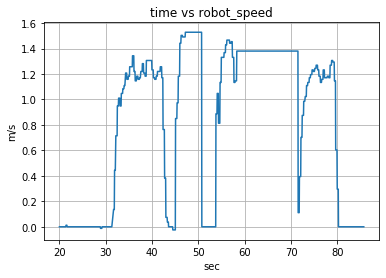

In [0]:
## Robot speed

plt.plot(rawData["time"],rawData["m_speed"])
plt.grid(True, which ='major')
plt.title('time vs robot_speed')
plt.xlabel('sec')
plt.ylabel('m/s')
plt.show()

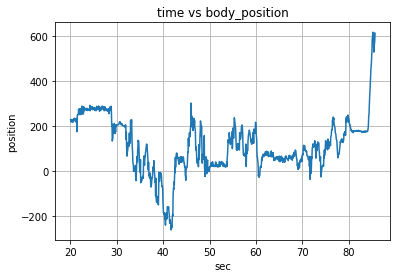

In [0]:
##time vs body_position

plt.plot(rawData["time"],rawData["LHip_x"])
plt.grid(True, which ='major')
plt.title('time vs body_position')
plt.xlabel('sec')
plt.ylabel('position')
plt.show()

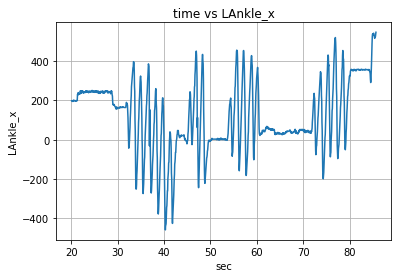

In [0]:

plt.plot(rawData["time"],rawData["LAnkle_x"])
plt.grid(True, which ='major')
plt.title('time vs LAnkle_x')
plt.xlabel('sec')
plt.ylabel('LAnkle_x')
plt.show()

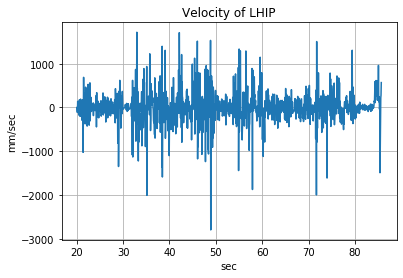

In [0]:
##Make Velocity of Torso

velocity_torso =  (rawData['LHip_x'][1:].to_numpy() - rawData['LHip_x'][:-1].to_numpy()) / (rawData['time'][1:].to_numpy() - rawData['time'][:-1].to_numpy())
velocity_torso = np.insert(velocity_torso,0,0) #insert '0' to array[0]

rawData["velocity_torso"] = velocity_torso
#rawData["velocity_torso"].plot()

plt.plot(rawData["time"],rawData["velocity_torso"])
plt.grid(True, which ='major') 
plt.title('Velocity of LHIP')
plt.xlabel('sec')
plt.ylabel('mm/sec')
plt.show()

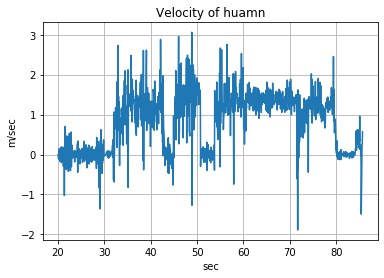

In [0]:
## Huamn speed 
rawData["velocity_human"] =  rawData["m_speed"] +  rawData["velocity_torso"]/1000

plt.plot(rawData["time"],rawData["velocity_human"])
plt.grid(True, which ='major') 
plt.title('Velocity of huamn')
plt.xlabel('sec')
plt.ylabel('m/sec')
plt.show()

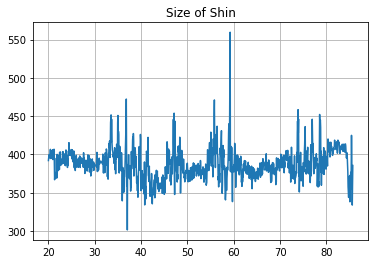

In [0]:
plt.grid(True, which ='major')
#Make Size_Of_left_shin

size_of_shin= np.sqrt((rawData['LKnee_x'] - rawData['LAnkle_x'])**2 + (rawData['LKnee_y'] - rawData['LAnkle_y'])**2 + (rawData['LKnee_z'] - rawData['LAnkle_z'])**2 
                     )
rawData["size_of_shin"] = size_of_shin
#rawData["size_of_shin"].plot()
plt.plot(rawData["time"],rawData["size_of_shin"])

plt.title('Size of Shin')
plt.grid(True, which ='major')
plt.show()

In [0]:
#vector_(knee,foot)_left

left_shin_x = rawData["LAnkle_x"] - rawData["LKnee_x"]
left_shin_y = rawData["LAnkle_y"] - rawData["LKnee_y"]
left_shin_z = rawData["LAnkle_z"] - rawData["LKnee_z"]
right_shin_x = rawData["RAnkle_x"] - rawData["RKnee_x"]
right_shin_y = rawData["RAnkle_y"] - rawData["RKnee_y"]
right_shin_z = rawData["RAnkle_z"] - rawData["RKnee_z"]

left_thigh_x = rawData["LHip_x"] - rawData["LKnee_x"]
left_thigh_y = rawData["LHip_y"] - rawData["LKnee_y"]
left_thigh_z = rawData["LHip_z"] - rawData["LKnee_z"]
right_thigh_x = rawData["RHip_x"] - rawData["RKnee_x"]
right_thigh_y = rawData["RHip_y"] - rawData["RKnee_y"]
right_thigh_z = rawData["RHip_z"] - rawData["RKnee_z"]

#cosine(theta) = dot(v1,v2)/(norm(v1)*norm(v2))
#cosine(theta_left)
costheta_left = ((left_shin_x * left_thigh_x) + (left_shin_y * left_thigh_y) + (left_shin_z * left_thigh_z)) / \
(np.sqrt(left_shin_x**2 + left_shin_y**2 + left_shin_z**2) * np.sqrt(left_thigh_x**2 + left_thigh_y**2 + left_thigh_z**2)) 

#cosine(theta_right)
costheta_right = ((right_shin_x * right_thigh_x) + (right_shin_y * right_thigh_y) + (right_shin_z * right_thigh_z)) / (np.sqrt(right_shin_x**2 + right_shin_y**2 + right_shin_z**2) * np.sqrt(right_thigh_x**2 + right_thigh_y**2 + right_thigh_z**2)) 

#calculate theta of knee 

rawData['theta_leftknee'] = np.arccos(costheta_left) / np.pi * 180
rawData['theta_rightknee'] = np.arccos(costheta_right) / np.pi * 180


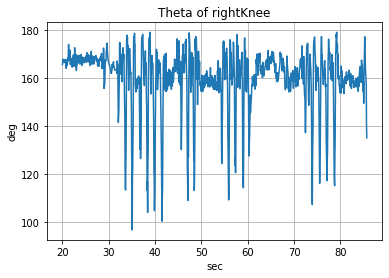

In [0]:

#show knee graph

plt.plot(rawData["time"],rawData['theta_leftknee'])
#plt.plot(rawData["time"],rawData['theta_rightknee'])
plt.grid(True, which ='major')
plt.title('Theta of rightKnee')
plt.xlabel('sec')
plt.ylabel('deg')
#rawData['theta_leftknee'].plot()
#rawData['theta_rightknee'].plot()
plt.show()

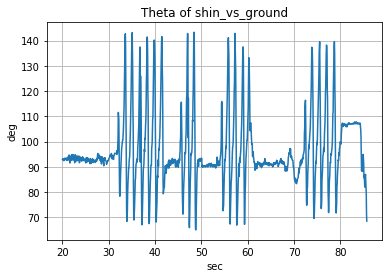

In [0]:
### Theta Knee_vs_ground

shin_x = -left_shin_x
shin_y = -left_shin_y
shin_z = -left_shin_z

costheta_Knee_vs_ground = ((shin_x * 1) + (shin_y * 0) + (shin_z * 0)) / \
 (np.sqrt(shin_x**2 + shin_y**2 + shin_z**2) * np.sqrt(1**2 + 0**2 + 0**2)) 

rawData['theta_shin_vs_ground'] = np.arccos(costheta_Knee_vs_ground) / np.pi * 180

plt.plot(rawData["time"],rawData['theta_shin_vs_ground'])
plt.grid(True, which ='major')
plt.title('Theta of shin_vs_ground')
plt.xlabel('sec')
plt.ylabel('deg')
#rawData['theta_leftknee'].plot()
#rawData['theta_rightknee'].plot()

plt.show()

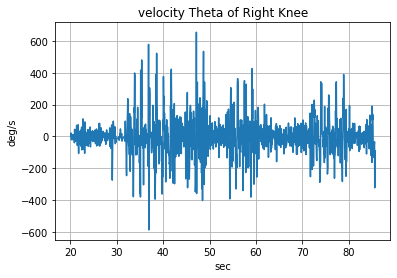

In [0]:
#Make Angle velocity of knee

##left knee
velocity_knee_left =  (rawData['theta_leftknee'][1:].to_numpy() - rawData['theta_leftknee'][:-1].to_numpy()) / (rawData['time'][1:].to_numpy() - rawData['time'][:-1].to_numpy())
velocity_knee_left = np.insert(velocity_knee_left,0,0) #insert '0' to array[0]
rawData["velocity_knee_left"] = velocity_knee_left

##right knee
velocity_knee_right =  (rawData['theta_rightknee'][1:].to_numpy() - rawData['theta_rightknee'][:-1].to_numpy()) / (rawData['time'][1:].to_numpy() - rawData['time'][:-1].to_numpy())
velocity_knee_right = np.insert(velocity_knee_right,0,0) #insert '0' to array[0]
rawData["velocity_knee_right"] = velocity_knee_right

##show graph
#rawData["velocity_knee_left"].plot()
#rawData["velocity_knee_right"].plot()
plt.plot(rawData["time"],rawData["velocity_knee_left"])
#plt.plot(rawData["time"],rawData["velocity_knee_right"])
plt.grid(True, which ='major')
plt.title('velocity Theta of Right Knee')
plt.xlabel('sec')
plt.ylabel('deg/s')
plt.show()

In [0]:
#store Data

rawData.to_csv(FileName +'inform' +'.csv')

In [0]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153 entries, 354 to 1557
Data columns (total 31 columns):
time                    1153 non-null float64
MidHip_x                1153 non-null int64
MidHip_y                1153 non-null int64
MidHip_z                1153 non-null int64
RHip_x                  1153 non-null int64
RHip_y                  1153 non-null int64
RHip_z                  1153 non-null int64
RKnee_x                 1153 non-null int64
RKnee_y                 1153 non-null int64
RKnee_z                 1153 non-null int64
RAnkle_x                1153 non-null int64
RAnkle_y                1153 non-null int64
RAnkle_z                1153 non-null int64
LHip_x                  1153 non-null int64
LHip_y                  1153 non-null int64
LHip_z                  1153 non-null int64
LKnee_x                 1153 non-null int64
LKnee_y                 1153 non-null int64
LKnee_z                 1153 non-null int64
LAnkle_x                1153 non-null int64
LAnkle_y 

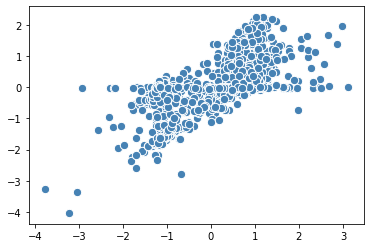

In [0]:
#data preprocessing

X = rawData[['theta_leftknee','theta_shin_vs_ground','velocity_knee_left']].values
y = rawData['velocity_human'].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

#learning
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="rbf", gamma='auto', degree=10, C=10000, epsilon = 0.01,verbose = False )
svm_poly_reg.fit(X_std,y_std)
y_pred_training = svm_poly_reg.predict(X_std)
plt.scatter(y_std, y_std - y_pred_training , c='steelblue', edgecolor='white', s=70)



In [0]:
#test preprocessing
testData = pd.read_csv('sklt_Data2inform.csv', index_col = False)

X_test = testData[['theta_leftknee','theta_shin_vs_ground','velocity_knee_left']].values
y_test = testData['velocity_human'].values

X_std_t = sc_x.fit_transform(X_test)
y_std_t = sc_y.fit_transform(y_test[:, np.newaxis]).flatten()

y_pred_test = svm_poly_reg.predict(X_std_t)



FileNotFoundError: ignored

In [0]:
## model evaluation

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(y_std.shape, y_pred_training.shape)

print('Training MSE : %.3f' %(mean_squared_error(y_std, y_pred_training)))
print('Training R_2score : %.3f' %(r2_score(y_std, y_pred_training )))

#print('Test MSE : %.3f' %(mean_squared_error(y_std_t, y_pred_test )))
#print('Test R_2score : %.3f' %(r2_score(y_std_t, y_pred_test )))

(1153,) (1153,)
Training MSE : 0.663
Training R_2score : 0.337
